# 텍스트분석

## Bag of Words - BOW

- 문서가 가지는 모든 단어를 문맥이나 순서를 무시하고 일괄적으로 단어에 대해 빈도 값을 부여해 피처 값을 추출하는 모델

#### 예시
    - 문장1: ‘My wife likes to watch baseball games and my daughter likes to watch baseball games too. ‘
    - 문장 2: ‘My wife likes to play baseball.
1. 문장 1과 문장 2에 있는 모든 단어에서 중복을 제거하고 각 단어를 칼럼 형태로 나열, 각 단어에 대해 고유의 인덱스를 부여
1. 개별 문장에서 해당 단어가 나타나는 횟수를 각 단어에 기재
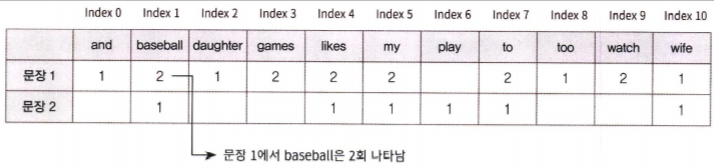

### 장단점
#### 장점
- 쉽고 빠른 구축
- 전통적으로 여러 분야에서 높은 활용도  

#### 단점
- 문맥의미 반영 부족 : 단어의 순서를 고려하지 않기 때문에 문장 내에서 단어의 문맥적인 의미가 무시됨.
- 희소 행렬 문제 : 희소 행렬 형태의 데이터 세트가 만들어지기 쉬움. 

### 피처 벡터화
- 카운트 기반의 벡터화
    - 각 문서에서 해당 단어가 나타나는 횟수로 부여
    - 언어의 특성상 문장에서 자주 사용될 수 밖에 없는 단어까지 높은 값을 부여하게 되는 분제
- TF_IDF 기반의 벡터화
    - 개별 문서에서 자주 나타나는 단어에 높은 가중치, 모든 문서에서 전반적으로 자주 나타나는 단어에 대해서는 페널티
    - 예시  어떠한 문서에서 "분쟁", "종교 대립" 과 같은 단어가 자주 등장하면 해당 문서는 분쟁과 관련한 뉴스일 가능성이 높고, 그 문서의 특징을 잘 나타냄. but, "많은", "빈번하게" 와 같은 단어의 경우 문서의 특징과 관련성이 적지만 보편적으로 많이 사용되는 단어

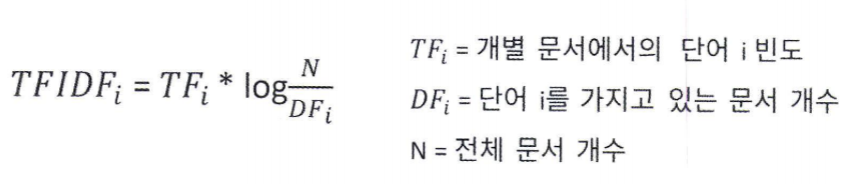

#### 사이킷런의 Count 및 TF-IDF 벡터화 구현
- max_df : 너무 높은 빈도수를 가지는 단어 피처를 제외. 100이면 전체 문서에 걸쳐 100개 이하로 나타나는 단어만 피처로 추출. 0~1의 실수형으로 넣으면 빈도수 95%까지의 단어만 피처로 추출. 나머지 상위 5%는 피처로 추출하지 않음.
- min_df : 전체 문서에 걸쳐서 너무 낮은 빈도수를 가지는 단어 피처를 제외. 마찬가지로 실수형은 %로 들어감.
- max_features : 추출하는 피처의 최대 개수를 제한. 2000이면 가장 높은 빈도를 가지는 단어 순으로 정렬하여 2000개까지만 피처로 추출
- stop_words : "english"로 지정하면 영어의 스톱 워드로 지정된 단어는 추출에서 제외
- n_gram_range : n_gram의 범위를 설정
- analyer : 피처 추출을 수행한 단위를 지정, default : word, character는 특정 범위를 피처로 만드는 특정한 경우 등을 적용
- token_pattern : 토큰화를 수행하는 정규 표현식 패턴
    - 디폴트 : "\b\w\w+\b" : 공백 또는 개행 문자 등으로 구분된 단어 분리자 사이의 2문자(영숫자) 이상의 단어를 토큰으로 분리
- tokenizer : 토큰화를 별도의 커스텀 함수로 이용시 적용

### 희소행렬 - COO 형식

- 0이 아닌 데이터만 별도의 데이터 배열(Array)에 저장하고, 그 데이터가 가리키는 행과 열의 위치를 별도의 배열로 저장하는 방식
- 예시 : [[3,0,1], [0,2,0]] 의 경우 0이 아닌 데이터는 [3,1,2] 이며 0이 아닌 데이터가 있는 위치 : (0,0), (0,2), (1,1) 이다. 이때 로우와 칼럼을 별도의 배열로 저장하면 로우 : [0,0,1], 칼럼 : [0,2,1] 


#### 사이파이를 이용한 COO 형식의 희소행렬

In [1]:
import numpy as np
dense = np.array([[3,0,1],[0,2,0]])

from scipy import sparse

# 0이 아닌 데이터 추출
data = np.array([3,1,2])

# 행 위치와 열 위치를 각각 배열로 생성
row_pos = np.array([0,0,1])
col_pos = np.array([0,2,1])

# sparse 패키지의 coo_matrix를 이용해 COO형식으로 희소행렬 생성
sparse_coo = sparse.coo_matrix((data,(row_pos, col_pos)))

In [3]:
sparse_coo.toarray() # 다시 밀집행렬 형태로 출력

array([[3, 0, 1],
       [0, 2, 0]])

### 희소행렬 - CSR 형식
- COO 형식의 비효율성
    - 행 위치 배열 : [0,0,1,1,1,1,1,2,2,3,4,4,5]
    - 행 위치 배열의 경우 0부터 순차적으로 증가하는 값으로 되어 있고, 같은 값이 반복되는 형태
- 행 배열의 고유한 값의 시작 위치만을 표기, 맨 마지막에 총 데이터의 개수만을 표시.
    - 행 위치 배열 : [0,2,7,9,10,12,13]
    - 뒤의 값에서 앞의 값을 뺀 만큼 해당 핻 인덱스의 데이터의 개수가 반복됨.
- COO 방식에 비해 빠른 연산과 적은 메모리가 가능
- 행과 열 둘다 고유 위치 index 행렬을 이용하여 표현할 수는 없음. 따라서 행만 CSR 형식으로 만들어야 함.

#### 사이파이를 이용한 CSR 형식의 희소행렬

In [14]:
from scipy import sparse

dense2 = np.array([[0,0,1,0,0,5],
                  [1,4,0,3,2,5],
                   [0,6,0,3,0,0],
                   [2,0,0,0,0,0],
                   [0,0,0,7,0,8],
                   [1,0,0,0,0,0]])

# 0이 아닌 데이터, 행 위치, 열 위치를 각각 array로 생성
data2, row_pos, col_pos = data_extraction(dense2)

# COO 형식으로 변환
sparse_coo = sparse.coo_matrix((data2, (row_pos,col_pos)))

# 행 위치 배열의 고유한 값의 시작 위치 인덱스를 배열로 생성
row_pos_idx = np.array([0,2,7,9,10,12,13])

# CSR 형식으로 변환
sparse_csr = sparse.csr_matrix((data2, col_pos, row_pos_idx))

# 다시 밀집행렬로 변환
print(sparse_coo.toarray())
print(sparse_csr.toarray())

[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]


In [6]:
def data_extraction(x): # 행을 기준으로 한 데이터, 행, 열 추출
    data = []
    row_idxs = []
    col_idxs = []
    for row_idx, row in enumerate(x):
        for col_idx, i in enumerate(row):
            if i:
                data.append(i)
                row_idxs.append(row_idx)
                col_idxs.append(col_idx)
    return np.array(data), np.array(row_idxs), np.array(col_idxs)

#### 데이터추출, row index, col index 추출 없이 바로 희소행렬로 변환

In [15]:
dense3 = dense2.copy()

coo = sparse.coo_matrix(dense3)
csr = sparse.csr_matrix(dense3)

# 다시 밀집행렬로 변환
print(coo.toarray())
print(csr.toarray())

[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]
